>> LINAC #1
Shot #1 already exists and will not be overwritten.
Shot #2 already exists and will not be overwritten.
Shot #3 already exists and will not be overwritten.
Shot #4 already exists and will not be overwritten.
Shot #5 already exists and will not be overwritten.
Shot #6 already exists and will not be overwritten.
Shot #7 already exists and will not be overwritten.
Shot #8 already exists and will not be overwritten.
Shot #9 already exists and will not be overwritten.
Shot #10 already exists and will not be overwritten.
>> LINAC #2
Shot #1 already exists and will not be overwritten.
Shot #2 already exists and will not be overwritten.
Shot #3 already exists and will not be overwritten.
Shot #4 already exists and will not be overwritten.
Shot #5 already exists and will not be overwritten.
Shot #6 already exists and will not be overwritten.
Shot #7 already exists and will not be overwritten.
Shot #8 already exists and will not be overwritten.
Shot #9 already exists and will not be 

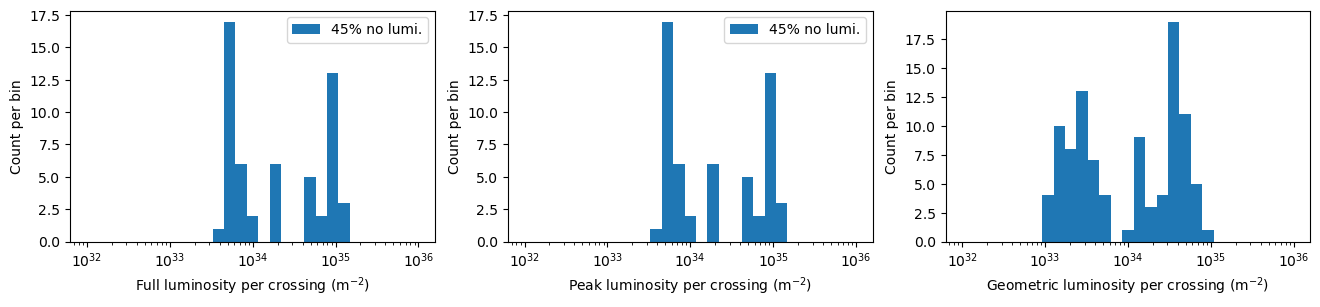

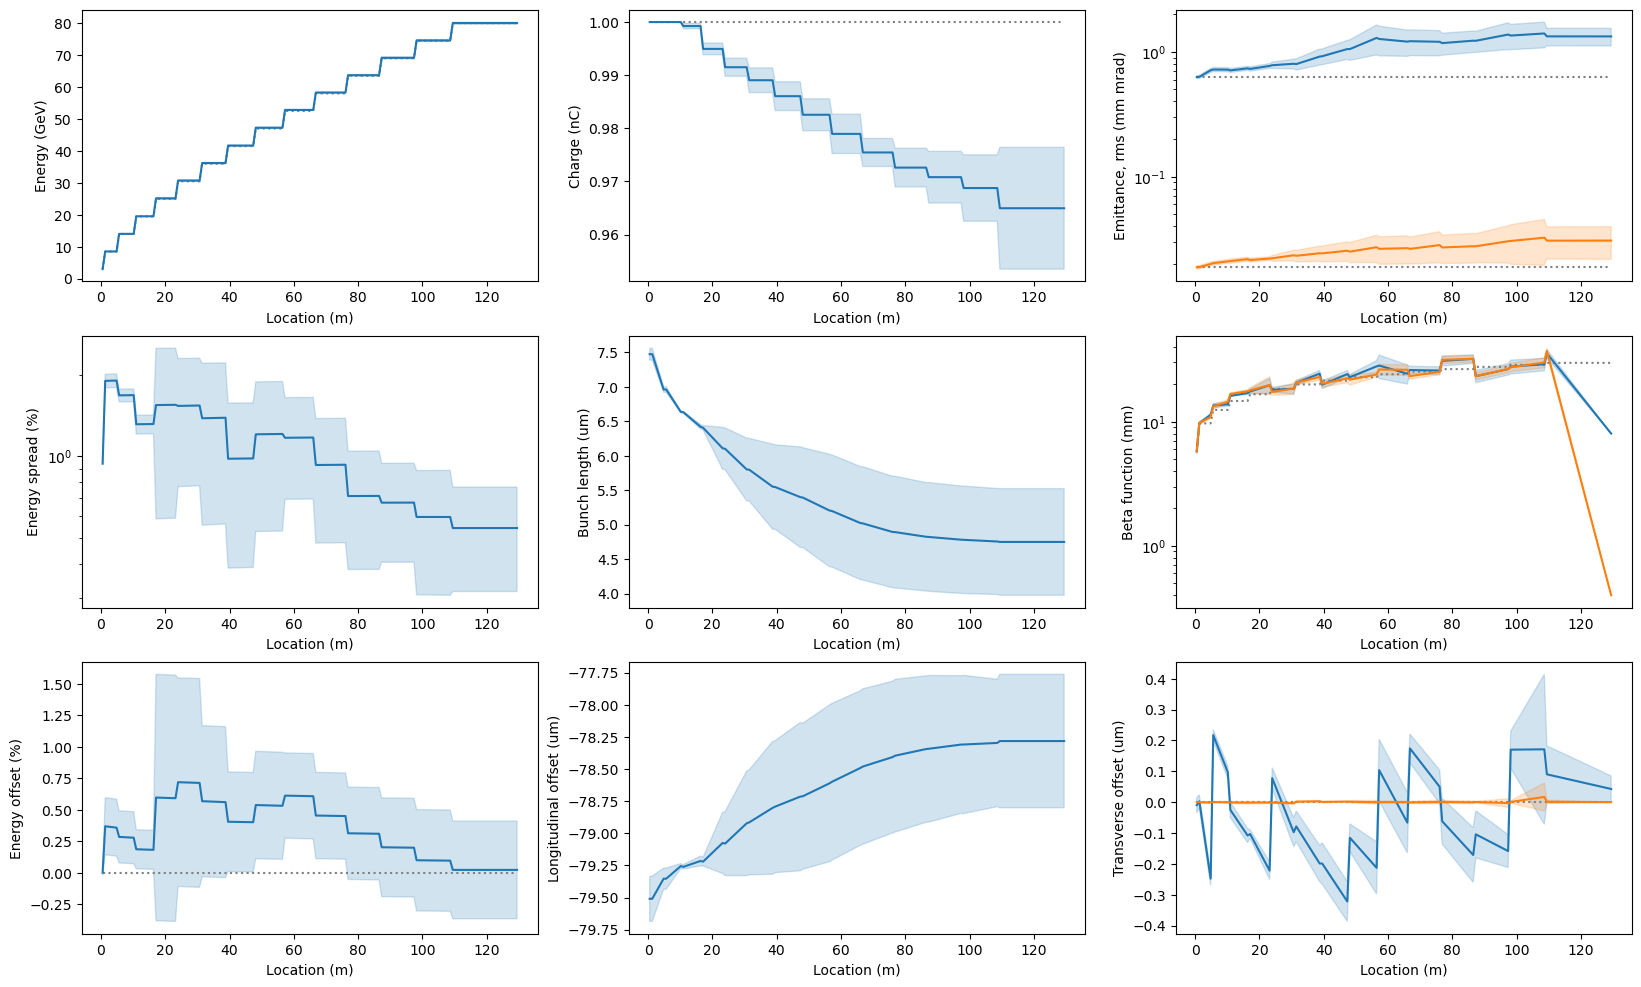

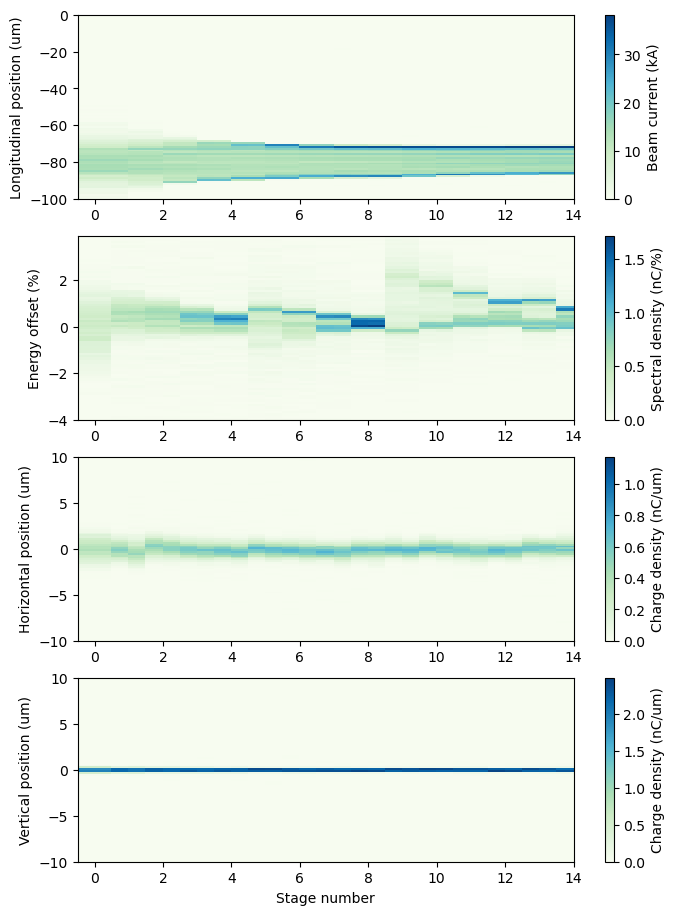

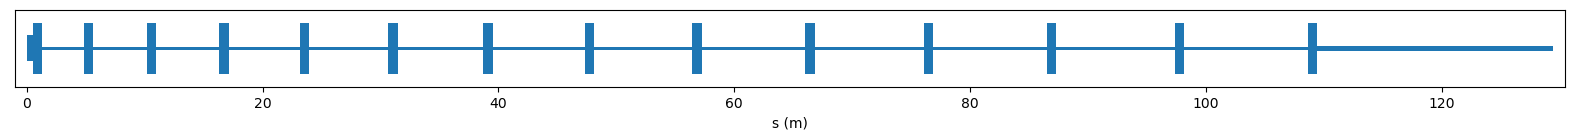

/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


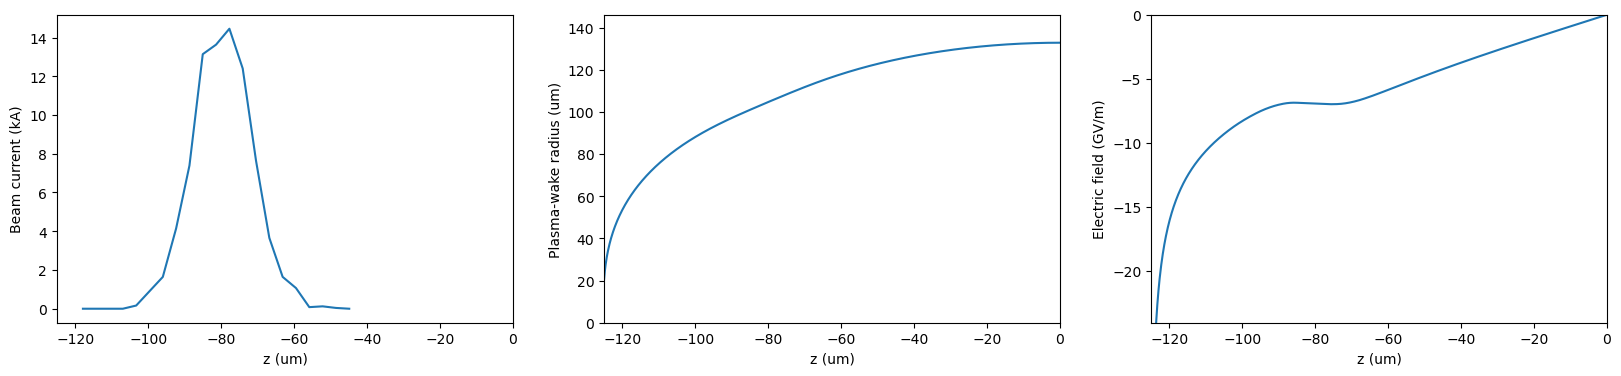

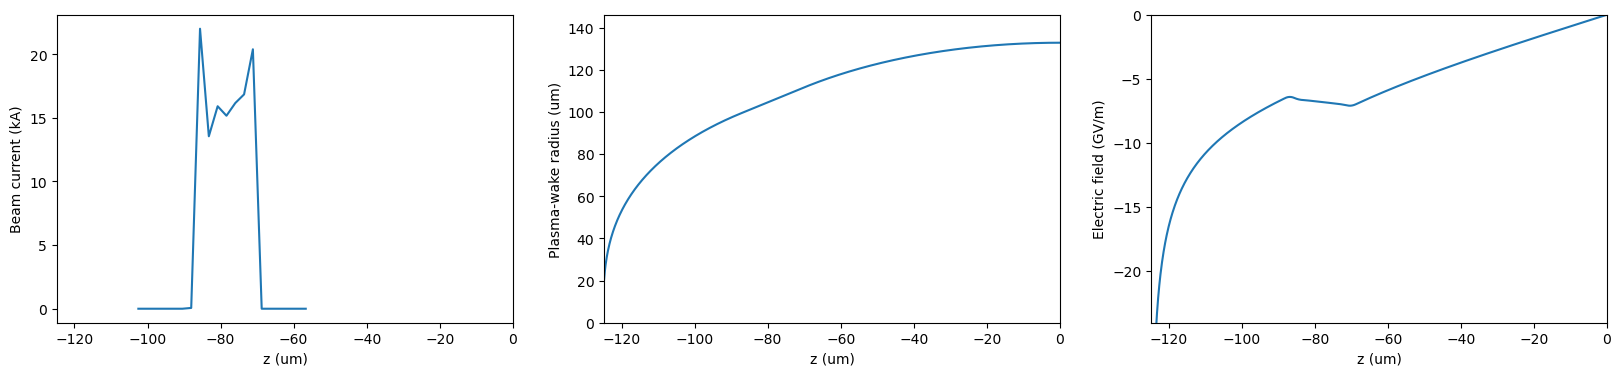

In [1]:
import sys
sys.path.append('../')
from opal import Linac, Collider
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, BeamDeliverySystemBasic, InteractionPointGUINEAPIG
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define stage
stage = StageNonlinear1D()
stage.deltaE = 5.5e9 # [eV]
stage.L = 0.8 # [m]
stage.n0 = 1e22 # [m^-3]
stage.kRb = 2.5

# define beam
source = SourceBasic()
source.L = 0.5 # [m]
source.Q = -1e-9 # [C]
source.E0 = 3e9 # [eV]
source.sigE = 0.01*source.E0 # [eV]
source.sigz = 8e-6 # [m]
source.z = -79.5e-6 # [m]
source.emitnx = 1e-6 # [m rad]
source.emitny = 0.03e-6 # [m rad]
source.betax = beta_matched(stage.n0, source.E0) # [m]
source.betay = source.betax
source.Npart = 2000

# define interstage
interstage = InterstageELEGANT()
interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
interstage.Bdip = 0.5 # [T]
interstage.Ldip = lambda E: 0.8 * np.sqrt(E/10e9) # [m(eV)]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_waist_x = 8e-3 # [m]
bds.beta_waist_y = 0.4e-3 # [m]
bds.L = 20

# define linac
linac = Linac(source, stage, interstage, bds, 14)

# define interaction point
ip = InteractionPointGUINEAPIG()

# define collider
collider = Collider(linac, bds, ip)

# track particles
collider.run("gamma-gamma", shots=10)

# plot survery and beam evolution
collider.plotLuminosity()
linac.plotEvolution()
linac.plotWaterfalls()
linac.plotSurvey()
stage.plotWakefield(linac.initialBeam())
stage.plotWakefield(linac.finalBeam())